In [1]:
! pip install komm

     |████████████████████████████████| 50 kB 3.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 15.7 MB 9.2 MB/s             |██████████▌                     | 5.2 MB 9.2 MB/s eta 0:00:02
     |████████████████████████████████| 38.1 MB 396 kB/s              20.9 MB 19.0 MB/s eta 0:00:01
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56607 sha256=c5ffb2662f4996bbd50e37a8326a10d984154a1ffd3b8b9df066d988629dd47f
  Stored in directory: /home/jovyan/.cache/pip/wheels/67/d6/14/a8e4b0235b3dc3c8a28c4e2059b66ad5b8c262df15df54f843
Successfully built komm


In [2]:
! pip install scikit-dsp-comm
! pip install sympy

     |████████████████████████████████| 90 kB 3.3 MB/s             
     |████████████████████████████████| 11.2 MB 10.2 MB/s            
     |████████████████████████████████| 890 kB 50.7 MB/s            
     |████████████████████████████████| 4.3 MB 38.6 MB/s            
     |████████████████████████████████| 1.1 MB 49.0 MB/s            
     |████████████████████████████████| 6.2 MB 4.6 MB/s            
     |████████████████████████████████| 532 kB 27.7 MB/s            


In [3]:
import math
import komm
import sympy as sp
from sympy.stats import Normal, density, E, std, cdf
sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
import ipywidgets
from scipy.stats import binom

In [4]:
E_s = 1
# sigma = N_0/2

# 2-PAM
M_2pam = 2
Eb = E_s/np.log2(M_2pam)
dmin = np.sqrt((12*E_s)/(M_2pam^2-1))
Ndmin = 1
ηp = (dmin**2)/Eb

# 4-PAM
M_4pam = 4
Eb = E_s/np.log2(M_4pam)
dmin = np.sqrt((12*E_s)/(M_4pam^2-1))
ηp = (dmin**2)/Eb

In [5]:
def Q(x):
    return sp.simplify(1/2 * sp.erfc(x/sp.sqrt(2)))
y = sp.Symbol("y")

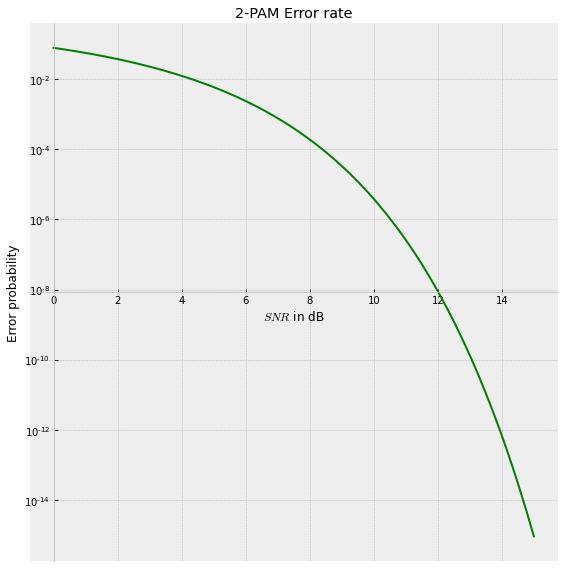

In [6]:
plt.rcParams['figure.figsize'] = 8, 8
plot_aux = sp.plot(sp.N((2*(M_2pam-1)/M_2pam)*Q(sp.sqrt(3* 10**(y/10)/((M_2pam**2-1)/2)))), (y,0,15),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='2-PAM Error rate',show=False);
plot_aux[0].line_color = 'g'
plot_aux.show()

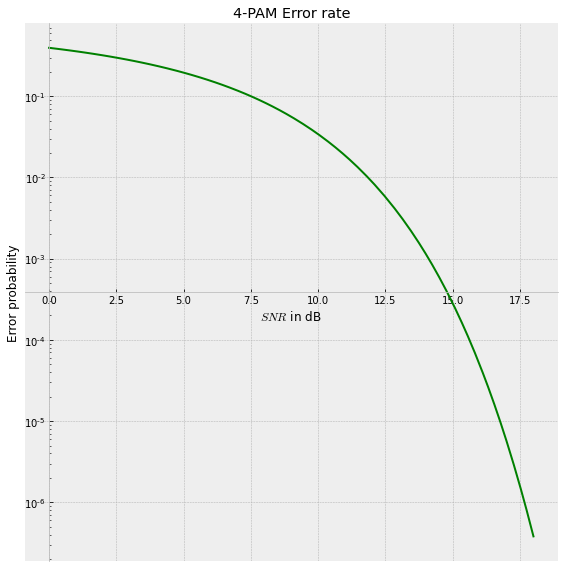

In [7]:
plt.rcParams['figure.figsize'] = 8, 8
plot_aux = sp.plot(sp.N((2*(M_4pam-1)/M_4pam)*Q(sp.sqrt(3*10**(y/10)/((M_4pam**2-1)/2)))), (y,0,18),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='4-PAM Error rate',show=False);
plot_aux[0].line_color = 'g'
plot_aux.show()

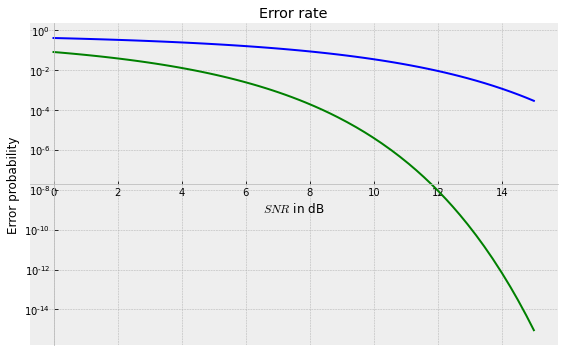

In [8]:
plt.rcParams['figure.figsize'] = 8, 5
plot_aux = sp.plot(sp.N((2*(M_2pam-1)/M_2pam)*Q(sp.sqrt(3* 10**(y/10)/((M_2pam**2-1)/2)))), sp.N((2*(M_4pam-1)/M_4pam)*Q(sp.sqrt(3*10**(y/10)/((M_4pam**2-1)/2)))),(y,0,15),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='Error rate',show=False);
plot_aux[0].line_color = 'g'
plot_aux[1].line_color = 'b'
plot_aux.show()

In [9]:
# 4-QAM
M_4qam = 4
Eb = E_s/np.log2(M_4qam)
delta = np.sqrt((3*E_s)/(2*(M_4qam-1)))

# 16-QAM
M_16qam = 16
Eb = E_s/np.log2(M_16qam)
delta = np.sqrt((3*E_s)/(2*(M_16qam-1)))

# 64-QAM
M_64qam = 64
Eb = E_s/np.log2(M_64qam)
delta = np.sqrt((3*E_s)/(2*(M_64qam-1)))

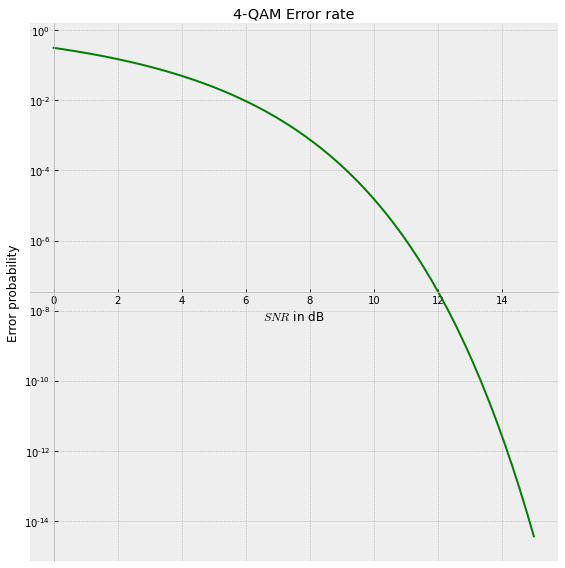

In [10]:
plt.rcParams['figure.figsize'] = 8, 8
plot_aux = sp.plot(sp.N((4*Q(sp.sqrt((3*np.log2(M_4qam))/(M_4qam-1)* 10**(y/10))))), (y,0,15),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='4-QAM Error rate',show=False);
plot_aux[0].line_color = 'g'
plot_aux.show()

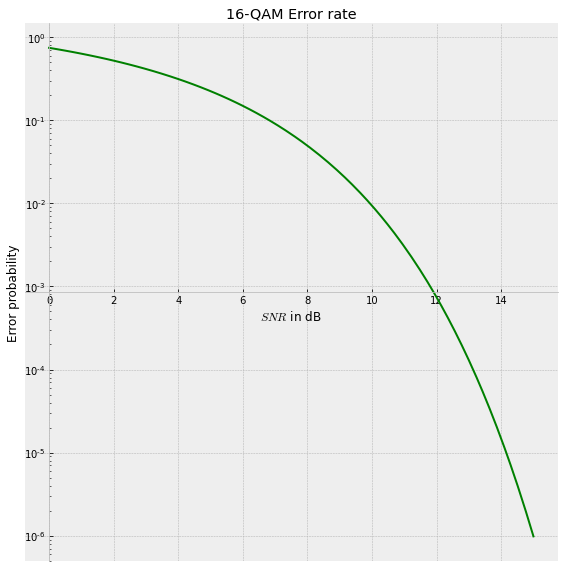

In [11]:
plt.rcParams['figure.figsize'] = 8, 8
plot_aux = sp.plot(sp.N((4*Q(sp.sqrt((3*np.log2(M_16qam))/(M_16qam-1)* 10**(y/10))))), (y,0,15),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='16-QAM Error rate',show=False);
plot_aux[0].line_color = 'g'
plot_aux.show()

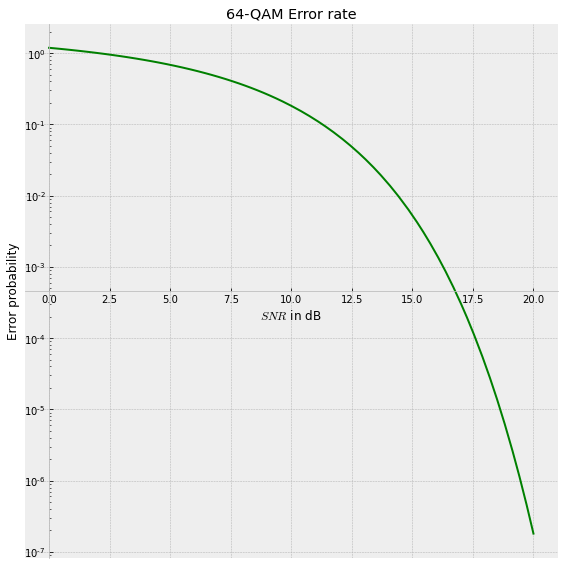

In [12]:
plt.rcParams['figure.figsize'] = 8, 8
plot_aux = sp.plot(sp.N((4*Q(sp.sqrt((3*np.log2(M_64qam))/(M_64qam-1)* 10**(y/10))))), (y,0,20),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='64-QAM Error rate',show=False);
plot_aux[0].line_color = 'g'
plot_aux.show()

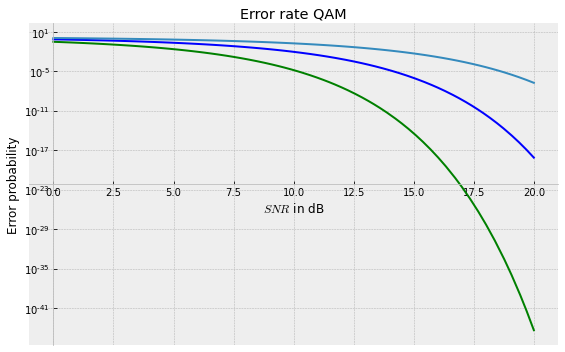

In [13]:
plt.rcParams['figure.figsize'] = 8, 5
plot_aux = sp.plot(sp.N((4*Q(sp.sqrt((3*np.log2(M_4qam))/(M_4qam-1)* 10**(y/10))))), sp.N((4*Q(sp.sqrt((3*np.log2(M_16qam))/(M_16qam-1)* 10**(y/10))))), sp.N((4*Q(sp.sqrt((3*np.log2(M_64qam))/(M_64qam-1)* 10**(y/10))))), (y,0,20),xlabel='$SNR$ in dB',
        ylabel='Error probability', yscale= 'log', title='Error rate QAM',show=False);
plot_aux[0].line_color = 'g'
plot_aux[1].line_color = 'b'
plot_aux.show()

In [14]:
def Q(x):
    return 1/2*scipy.special.erfc(x/np.sqrt(2))
y = sp.Symbol("y")

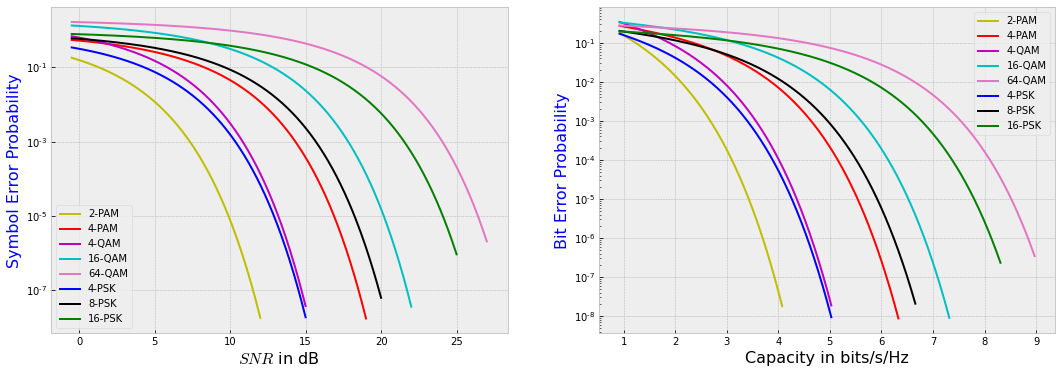

In [70]:
#2-PAM
base_amplitude = 1
noise_power_db_2pam = np.arange(-12, 0.5, 0.01)
noise_power_2pam = 10**(noise_power_db_2pam / 10)
awgn = komm.AWGNChannel()
order = 2
modulation = komm.PAModulation(order, base_amplitude)
awgn.signal_power_2pam  = 1
awgn.snr_2pam  = awgn.signal_power_2pam  / noise_power_2pam
EbperN0_2pam = awgn.snr_2pam / modulation.bits_per_symbol
error_probability_2pam  = 2*Q(np.sqrt(6*(np.log2(order))/(order**2-1) * EbperN0_2pam))
bit_error_rate_2pam = error_probability_2pam/(np.log2(order))

#4-PAM
base_amplitude = 1
noise_power_db_4pam = np.arange(-19, 0.5, 0.01)
noise_power_4pam = 10**(noise_power_db_4pam / 10)
order = 4
modulation = komm.PAModulation(order, base_amplitude)
awgn.signal_power_4pam  = 1
awgn.snr_4pam  = awgn.signal_power_4pam  / noise_power_4pam
EbperN0_4pam = awgn.snr_4pam / modulation.bits_per_symbol
error_probability_4pam  = 2*Q(np.sqrt(6*(np.log2(order))/(order**2-1) * EbperN0_4pam))
bit_error_rate_4pam = error_probability_4pam/(np.log2(order))

#4-QAM
base_amplitude = 1
noise_power_db_4qam = np.arange(-15, 0.5, 0.01)
noise_power_4qam = 10**(noise_power_db_4qam / 10)
order = 4
modulation = komm.QAModulation(order, base_amplitude)
awgn.signal_power_4qam  = 1
awgn.snr_4qam  = awgn.signal_power_4qam  / noise_power_4qam
EbperN0_4qam = awgn.snr_4qam / modulation.bits_per_symbol
error_probability_4qam  = 4*Q(np.sqrt( 3* (np.log2(order)/(order-1)) * EbperN0_4qam)) 
bit_error_rate_4qam = error_probability_4qam/(np.log2(order))

#16-QAM
base_amplitude = 1
noise_power_db_16qam = np.arange(-22, 0.5, 0.01)
noise_power_16qam = 10**(noise_power_db_16qam / 10)
order = 16
modulation = komm.QAModulation(order, base_amplitude)
awgn.signal_power_16qam  = 1
awgn.snr_16qam  = awgn.signal_power_16qam  / noise_power_16qam
EbperN0_16qam  = awgn.snr_16qam / modulation.bits_per_symbol
error_probability_16qam  = 4*Q(np.sqrt( 3* (np.log2(order)/(order-1)) * EbperN0_16qam)) 
bit_error_rate_16qam = error_probability_16qam/(np.log2(order))

#64-QAM
base_amplitude = 1
noise_power_db_64qam = np.arange(-27, 0.5, 0.01)
noise_power_64qam = 10**(noise_power_db_64qam / 10)
order = 64
modulation = komm.QAModulation(order, base_amplitude)
awgn.signal_power_64qam  = 1
awgn.snr_64qam  = awgn.signal_power_64qam  / noise_power_64qam
EbperN0_64qam  = awgn.snr_64qam / modulation.bits_per_symbol
error_probability_64qam  = 4*Q(np.sqrt( 3* (np.log2(order)/(order-1)) * EbperN0_64qam)) 
bit_error_rate_64qam = error_probability_64qam/(np.log2(order))

#4-PSK
base_amplitude = 1
noise_power_db_4psk = np.arange(-15, 0.5, 0.01)
noise_power_4psk = 10**(noise_power_db_4psk / 10)
order = 4
modulation = komm.PSKModulation(order, base_amplitude)
awgn.signal_power_4psk  = 1
awgn.snr_4psk  = awgn.signal_power_4psk  / noise_power_4psk
EbperN0_4psk = awgn.snr_4psk / modulation.bits_per_symbol
error_probability_4psk  = 2*Q(np.sqrt(2*EbperN0_4psk*np.log2(order))*np.sin(np.pi/order))
bit_error_rate_4psk = error_probability_4psk/(np.log2(order))

#8-PSK
base_amplitude = 1
noise_power_db_8psk = np.arange(-20, 0.5, 0.01)
noise_power_8psk = 10**(noise_power_db_8psk / 10)
order = 8
modulation = komm.PSKModulation(order, base_amplitude)
awgn.signal_power_8psk  = 1
awgn.snr_8psk  = awgn.signal_power_8psk  / noise_power_8psk
EbperN0_8psk  = awgn.snr_8psk / modulation.bits_per_symbol
error_probability_8psk  = 2*Q(np.sqrt(2*EbperN0_8psk*np.log2(order))*np.sin(np.pi/order))
bit_error_rate_8psk = error_probability_8psk/(np.log2(order))

#16-PSK
base_amplitude = 1
noise_power_db_16psk = np.arange(-25, 0.5, 0.01)
noise_power_16psk = 10**(noise_power_db_16psk / 10)
order = 16
modulation = komm.PSKModulation(order, base_amplitude)
awgn.signal_power_16psk  = 1
awgn.snr_16psk  = awgn.signal_power_16psk  / noise_power_16psk
EbperN0_16psk  = awgn.snr_16psk / modulation.bits_per_symbol
error_probability_16psk  = 2*Q(np.sqrt(2*EbperN0_16psk*np.log2(order))*np.sin(np.pi/order)) 
bit_error_rate_16psk = error_probability_16psk/(np.log2(order))

###
plt.figure(1,figsize=(18,6))
plt.subplot(121)
plt.semilogy(10 * np.log10(awgn.snr_2pam), error_probability_2pam,'y',label='2-PAM');
plt.semilogy(10 * np.log10(awgn.snr_4pam), error_probability_4pam,'r',label='4-PAM');
plt.semilogy(10 * np.log10(awgn.snr_4qam), error_probability_4qam,'m',label='4-QAM');
plt.semilogy(10 * np.log10(awgn.snr_16qam), error_probability_16qam,'c',label='16-QAM');
plt.semilogy(10 * np.log10(awgn.snr_64qam), error_probability_64qam,'tab:pink',label='64-QAM');
plt.semilogy(10 * np.log10(awgn.snr_4psk), error_probability_4psk,'b',label='4-PSK');
plt.semilogy(10 * np.log10(awgn.snr_8psk), error_probability_8psk,'k',label='8-PSK');
plt.semilogy(10 * np.log10(awgn.snr_16psk),error_probability_16psk,'g',label='16-PSK');
plt.xlabel('$SNR$ in dB',fontsize=16)
plt.ylabel('Symbol Error Probability', color='b',fontsize=16)
plt.legend()

plt.subplot(122)
plt.semilogy(np.log2(1+awgn.snr_2pam), bit_error_rate_2pam,'y',label='2-PAM');
plt.semilogy(np.log2(1+awgn.snr_4pam), bit_error_rate_4pam,'r',label='4-PAM');
plt.semilogy(np.log2(1+awgn.snr_4qam), bit_error_rate_4qam,'m',label='4-QAM');
plt.semilogy(np.log2(1+awgn.snr_16qam), bit_error_rate_16qam,'c',label='16-QAM');
plt.semilogy(np.log2(1+awgn.snr_64qam), bit_error_rate_64qam,'tab:pink',label='64-QAM');
plt.semilogy(np.log2(1+awgn.snr_4psk), bit_error_rate_4psk,'b',label='4-PSK');
plt.semilogy(np.log2(1+awgn.snr_8psk), bit_error_rate_8psk,'k',label='8-PSK');
plt.semilogy(np.log2(1+awgn.snr_16psk), bit_error_rate_16psk,'g',label='16-PSK');
plt.xlabel('Capacity in bits/s/Hz',fontsize=16);
plt.ylabel('Bit Error Probability', color='b',fontsize=16);
plt.legend();

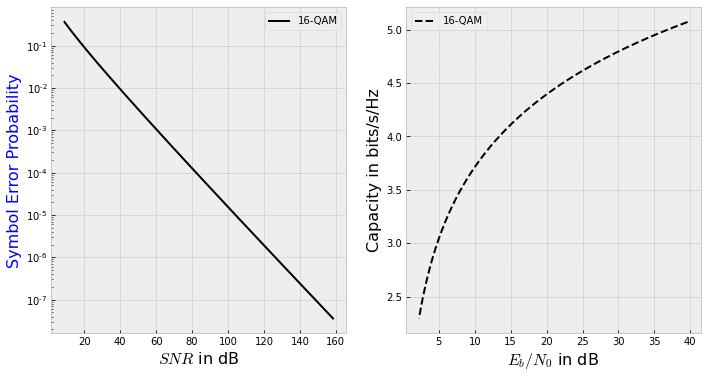

In [16]:
###################################
#16-QAM
base_amplitude = 1
awgn = komm.AWGNChannel()
noise_power_db_16qam = np.arange(-12, 0.5, 0.01)
noise_power_16qam = 10**(noise_power_db_16qam / 10)
order = 16
modulation = komm.QAModulation(order, base_amplitude)
awgn.signal_power_16qam  = modulation.energy_per_symbol
awgn.snr_16qam  = awgn.signal_power_16qam  / noise_power_16qam
EbperN0_16qam  = awgn.snr_16qam / modulation.bits_per_symbol
error_probability_16qam  = 4*Q(np.sqrt( 3* (np.log2(order)/(order-1)) * EbperN0_16qam)) 
#
###
plt.figure(1,figsize=(18,6))

plt.subplot(132)
plt.semilogy(awgn.snr_16qam, error_probability_16qam,'k',label='16-QAM');
plt.xlabel('$SNR$ in dB',fontsize=16)
plt.ylabel('Symbol Error Probability', color='b',fontsize=16)
plt.legend()

plt.subplot(133)
plt.plot(EbperN0_16qam, np.log(1+awgn.snr_16qam),'--k',label='16-QAM');
plt.xlabel('$E_b/N_0$ in dB',fontsize=16);
plt.ylabel('Capacity in bits/s/Hz', color='k',fontsize=16);
plt.legend();